In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#reading data
data = pd.read_csv("delivery_time.csv")

## Performing EDA

In [ ]:
#first 5 observations in dataset
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
#shape of the dataset
data.shape

(21, 2)

In [5]:
#gathering information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


- data contains numerical datatypes.

In [ ]:
# to check if any Non values are present in data
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
#Statistical summary of dataset
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
data.agg(["var","skew",'kurtosis'])

,Delivery Time,Sorting Time
var,25.754619,6.461905
skew,0.352390,0.047115
kurtosis,0.317960,-1.148455


In [ ]:
#renaming column names
data.rename(columns={"Delivery Time": "dt","Sorting Time":"st"},inplace = True)

## Visualizing the data 

### visualizing the frequency of columns present in data

<AxesSubplot:xlabel='dt', ylabel='Density'>

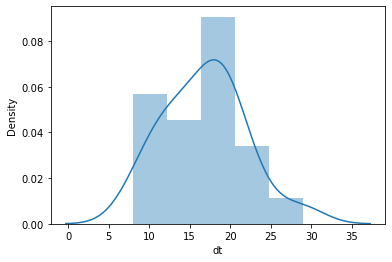

In [10]:
sns.distplot(data["dt"])

<AxesSubplot:xlabel='st', ylabel='Density'>

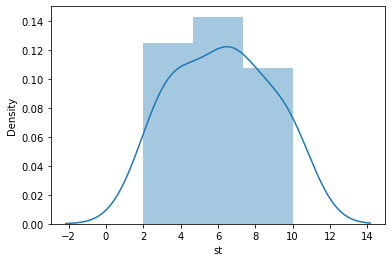

In [11]:
sns.distplot(data["st"])

### Conclusion:

- Data in columns is not normally distributed

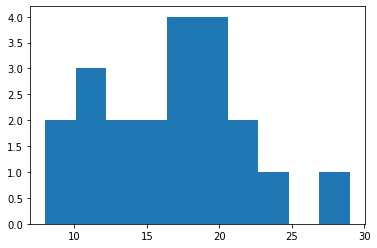

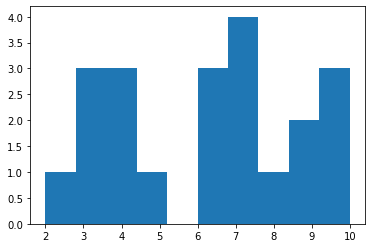

In [ ]:
for i in data:
    plt.hist(data[i])
    plt.show()

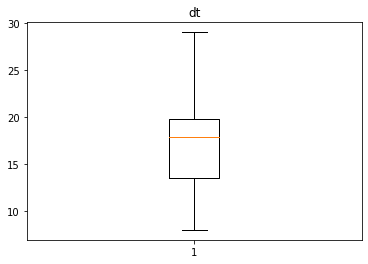

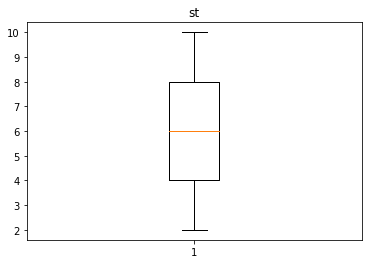

In [27]:
for i in data:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

### Relationship between dt and st

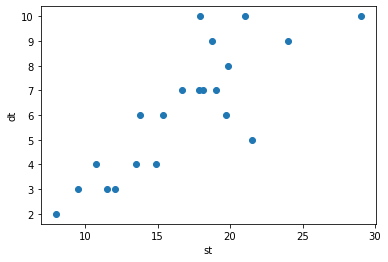

In [14]:
plt.scatter(data["dt"],data["st"])
plt.xlabel("st")
plt.ylabel("dt")
plt.show()

In [15]:
#co-relation between columns
data.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


<AxesSubplot:>

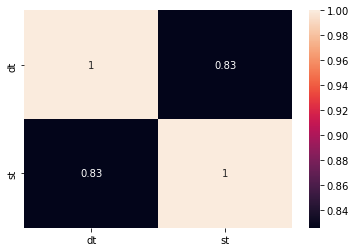

In [16]:
sns.heatmap(data.corr(),annot = True)

### Consclusion:

- We can see that target columns "dt" and input column "st" are positvely co-related with each other.

## Fitting a Linear Regression Model

In [28]:
import statsmodels.formula.api as smf
model = smf.ols("dt~st",data = data).fit()

<AxesSubplot:xlabel='st', ylabel='dt'>

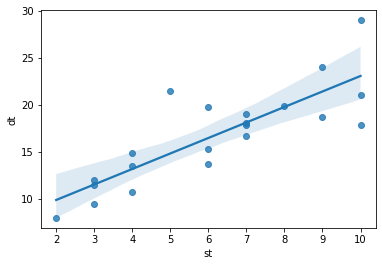

In [29]:
sns.regplot(x = "st", y = "dt", data = data)

In [30]:
#checking summary of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           3.98e-06
Time:                        23:51:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#coefficients
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [21]:
#t-value and p-value
print(model.tvalues,"\n",model.pvalues)

Intercept    3.823349
st           6.387447
dtype: float64 
 Intercept    0.001147
st           0.000004
dtype: float64


In [22]:
# R squared value
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## Predicting and testing new data points

In [23]:
new_data = pd.Series([10,7,6,4,2,1])

In [24]:
#creating new testing points dataframe
st_pred = pd.DataFrame(new_data,columns=["st"])

In [25]:
#predicted data
model.predict(st_pred)

0    23.072933
1    18.125873
2    16.476853
3    13.178814
4     9.880774
5     8.231754
dtype: float64

In [26]:
#residual values of model
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

-A residual is simply the difference between a model's fitted value and the actual value.

In [27]:
y_pred = data["st"]

In [28]:
prediction = model.predict(y_pred)
prediction

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [29]:
error = data["dt"] - prediction #actual-predicted
error

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

## Metrics

In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [31]:
mse = mean_squared_error(data["dt"],prediction)
mse

7.793311548584062

In [32]:
rmse = sqrt(mse)
rmse

2.7916503270617654

## Conclusion

- By observation we can say that the model is neither overfitted not underfitted.
- but the score of model is low we can try to imporve model score by log transformation

# Performing log transformation

In [33]:
log_data = pd.DataFrame()
log_data["log_dt"] = data["dt"]
log_data["log_st"] = np.log(data["st"])
log_data

,log_dt,log_st
0,21.00,2.302585
1,13.50,1.386294
2,19.75,1.791759
3,24.00,2.197225
4,29.00,2.302585
5,15.35,1.791759
6,19.00,1.945910
7,9.50,1.098612
8,17.90,2.302585
9,18.75,2.197225


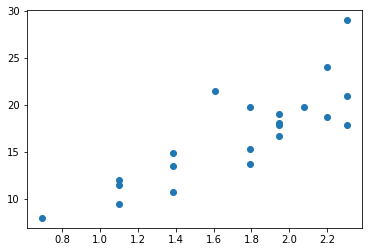

In [34]:
#relationship bewteen 2 columns
plt.scatter(x = log_data["log_st"],y = log_data["log_dt"])

<AxesSubplot:xlabel='log_st', ylabel='log_dt'>

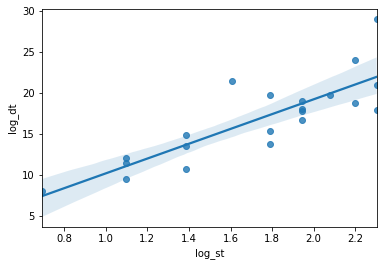

In [35]:
sns.regplot(x = "log_st", y = "log_dt", data = log_data)

In [36]:
model2 = smf.ols("log_dt~log_st",data = log_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           2.64e-06
Time:                        12:27:29   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
log_st         9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [38]:
(model2.tvalues,"\n",model2.pvalues)

(Intercept    0.472460
 log_st       6.586789
 dtype: float64,
 '\n',
 Intercept    0.641980
 log_st       0.000003
 dtype: float64)

In [39]:
model2.params

Intercept    1.159684
log_st       9.043413
dtype: float64

## predicting by log_data

In [40]:
log_pred = log_data["log_st"]

In [41]:
log_prediction = model2.predict(log_pred)
log_prediction

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [42]:
error = log_data["log_dt"] - log_prediction
error

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

## Metrics

In [43]:
mse = mean_squared_error(log_data["log_dt"],log_prediction)
mse

7.470226320948425

In [44]:
rmse = sqrt(mse)
rmse

2.733171476682066

## comparison of original dataset and predicted points

In [45]:
df = data.copy()

In [46]:
df["prediction_dt"] = model.fittedvalues
df["log_prediction_dt"] = model2.fittedvalues
df

,dt,st,prediction_dt,log_prediction_dt
0,21.00,10,23.072933,21.982913
1,13.50,4,13.178814,13.696517
2,19.75,6,16.476853,17.363305
3,24.00,9,21.423913,21.030094
4,29.00,10,23.072933,21.982913
5,15.35,6,16.476853,17.363305
6,19.00,7,18.125873,18.757354
7,9.50,3,11.529794,11.094889
8,17.90,10,23.072933,21.982913
9,18.75,9,21.423913,21.030094


## Conclusion:

- Before performing log transformation model score was 0.682.
- But after performing log transformation model score was 0.695.
- hence, model performance increased after taking log transfromation.